# Q3

In [282]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt
import math

In [283]:
image = cv2.imread('face.jpg')[:,:,::-1]

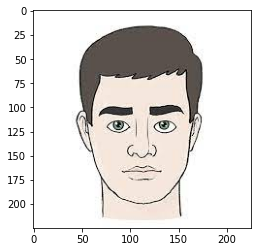

In [284]:
plt.imshow(image)

In [285]:
def similar_colors(rgb1, rgb2, threshold=50):
    # Convert RGB colors to LAB colors
    lab1 = rgb_to_lab(rgb1)
    lab2 = rgb_to_lab(rgb2)
    
    # Calculate the Euclidean distance between the LAB values
    delta_e = math.sqrt((lab1[0]-lab2[0])**2 + (lab1[1]-lab2[1])**2 + (lab1[2]-lab2[2])**2)
    
    # Return True if the Euclidean distance is below the threshold
    return delta_e <= threshold

def rgb_to_lab(rgb):
    # Convert RGB values to the LAB color space using the sRGB color space as a reference white point
    r = rgb[0] / 255.0
    g = rgb[1] / 255.0
    b = rgb[2] / 255.0
    
    # Apply a gamma correction to the RGB values
    r = pow((r + 0.055) / 1.055, 2.4) if r > 0.04045 else r / 12.92
    g = pow((g + 0.055) / 1.055, 2.4) if g > 0.04045 else g / 12.92
    b = pow((b + 0.055) / 1.055, 2.4) if b > 0.04045 else b / 12.92
    
    # Convert the RGB values to the XYZ color space
    x = r * 0.4124 + g * 0.3576 + b * 0.1805
    y = r * 0.2126 + g * 0.7152 + b * 0.0722
    z = r * 0.0193 + g * 0.1192 + b * 0.9505
    
    # Convert the XYZ values to the LAB color space using the D65 white point reference
    x /= 0.95047
    y /= 1.00000
    z /= 1.08883
    
    x = pow(x, 1/3) if x > 0.008856 else (7.787 * x) + (16/116)
    y = pow(y, 1/3) if y > 0.008856 else (7.787 * y) + (16/116)
    z = pow(z, 1/3) if z > 0.008856 else (7.787 * z) + (16/116)
    
    l = (116 * y) - 16
    a = 500 * (x - y)
    b = 200 * (y - z)
    
    return (l, a, b)

In [286]:
def areSameColors(image, x1, y1, x2, y2, thresh):
    r1,g1,b1 = image[x1, y1]
    r2,g2,b2 = image[x2, y2]
    return similar_colors((r1,g1,b1), (r2,g2,b2), thresh)
    # if (r2-r1)**2 + (g2-g1)**2 + (b2-b1)**2 < 1500:
    #     return True
    # return False
    


def BFS(original_image, image, x, y, color, thresh):
    visited = [[False] * image.shape[1] for i in range(image.shape[0])]
    queue = [(x,y)]
    visited[x][y] = True
    image[x, y] = color
    w, h = image.shape[0], image.shape[1]
    while(len(queue) > 0):
        i, j = queue.pop(0)
        if(i+1 < w and (not visited[i+1][j]) and areSameColors(original_image, x, y, i+1, j, thresh)):
            image[i+1, j] = color
            visited[i+1][j] = True
            queue.append((i+1, j))
        if(i-1 >= 0 and (not visited[i-1][j]) and areSameColors(original_image, x, y, i-1, j, thresh)):
            image[i-1, j] = color
            visited[i-1][j] = True
            queue.append((i-1, j))
        if(j+1 < h and (not visited[i][j+1]) and areSameColors(original_image, x, y, i, j+1, thresh)):
            image[i, j+1] = color
            visited[i][j+1] = True
            queue.append((i, j+1))
        if(j-1 >= 0 and (not visited[i][j-1]) and areSameColors(original_image, x, y, i, j-1, thresh)):
            image[i, j-1] = color
            visited[i][j-1]
            queue.append((i, j-1))
    

In [287]:
def segment(image, x, y, color, thresh):
    segmented_image = image.copy()
    BFS(image, segmented_image, x, y, color, thresh)
    return segmented_image

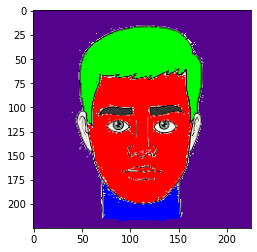

In [288]:
segmented_image_face = segment(image, image.shape[0]//2, image.shape[1]//2, [255,0,0], 10)
segmented_image_hair = segment(segmented_image_face, 50,100, [0,255,0], 10)
segmented_image_neck = segment(segmented_image_hair, 200, 85, [0,0,255], 8)
segmented_image_all = segment(segmented_image_neck, 10,10, [84,4,140], 7)
plt.imshow(segmented_image_all)